# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import re
import datetime

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

df = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
df.iloc[1]

Restaurant_id                                                     id_1
City                                                          Helsinki
Cuisine Style        ['European', 'Scandinavian', 'Gluten Free Opti...
Ranking                                                            106
Price Range                                                   $$ - $$$
Number of Reviews                                                   97
Reviews              [['Very good reviews!', 'Fine dining in Hakani...
URL_TA               /Restaurant_Review-g189934-d6674944-Reviews-Ra...
ID_TA                                                         d6674944
sample                                                               0
Rating                                                               0
Name: 1, dtype: object

In [14]:
df['Reviews'][1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

In [15]:
for item in df.iloc[0:10]['URL_TA']:
    print(item)

/Restaurant_Review-g187147-d10746918-Reviews-Le_Perchoir-Paris_Ile_de_France.html
/Restaurant_Review-g189934-d6674944-Reviews-Ravintola_Kolmon3n-Helsinki_Uusimaa.html
/Restaurant_Review-g186525-d13129638-Reviews-Black_Ivy-Edinburgh_Scotland.html
/Restaurant_Review-g186338-d680417-Reviews-Quirinale-London_England.html
/Restaurant_Review-g274924-d1112354-Reviews-Massimo_Ristorante-Bratislava_Bratislava_Region.html
/Restaurant_Review-g187147-d8458643-Reviews-Le_Comptoir_du_Louvre-Paris_Ile_de_France.html
/Restaurant_Review-g189158-d8758873-Reviews-Lisboa_City-Lisbon_Lisbon_District_Central_Portugal.html
/Restaurant_Review-g274887-d8286886-Reviews-Beer_N_Scooter-Budapest_Central_Hungary.html
/Restaurant_Review-g189934-d12947542-Reviews-Bistro_Gimis-Helsinki_Uusimaa.html
/Restaurant_Review-g189852-d12716384-Reviews-Il_Molo-Stockholm.html


1. # Cleaning and Prepaing Data

##### Ranking

Ranking является важным признаком для оценки популялярности. Однако имеет несколько недостатков:
- Зависит от "размера" города, чем ниже ренкинг, тем больше зависимость. Ренкинг 100 в большом и небольшом городе - несравнимые показатели популярности.
- Строгая иерария несколько натянута. Рестораны с ренкингом 3 и  23 в большом городе, фактически, одинаковы по популярности.
Поэтому имеет смысл перевести показатели ренкинга в относительные единицы. Создадим новый признак, показывающий в какую группу по ренкигу в данном городе попадате ресторам. Создадим 10 групп: 1 - самые популярные, 10 - самые непопулярные.

In [16]:
# Предрасчитываем максимальный ренкинг по каждому городу
ranking_max = df.groupby(['City'])['Ranking'].max()

In [17]:
# Функция переводит абсолютный ренкинг ресторана в относителный
# Количество групп задается параметром
def ranking_by_steps(row, q):
    step = ranking_max[row['City']] / q
    return math.ceil(row['Ranking'] / step)

In [18]:
# Создаем новый столбец, в который вносим данные по ренкингу в относительных единицах
# 1 - 10% самых популярных, 10 - 10% самых непопулярных
df['Ranking Group'] = df.apply(lambda row: ranking_by_steps(row, 10), axis=1)

##### Number of Reviews
Не требует переработки

##### Cuisine Style

Из данных этого столбца можно извлечь информацию о разнобразии предлагаемой кухни. Мерой разнообразим можно считать количество стилей.

In [19]:
# Функция преобразует строку с описанием стилей кухни в список этих стилей
def cousine_list(text):
    if not text is np.nan:
        cousine = []
        regex = re.compile('\'.+?\'')
        res = regex.findall(text)
        for item in res:
            cousine.append(item[1:-1])
        return cousine
    else:
        return text

In [20]:
# Функция рассчитывает количество стилей кухни ресторана
def cousine_count(text):
    if not text is np.nan:
        return len(cousine_list(text))
    else:
        return text

In [21]:
# Добавляем новый столбец с количеством стилей кухни ресторана
df['Cuisine Style Quantity'] = df['Cuisine Style'].apply(cousine_count)

In [22]:
# Создадим таблицу присутствия разных стилей в ресторанах
cousine_count = {}
# Создадим словарь с парой "кухня - кол-во ресторанов, в которых данная кухня присутствует"
for item in df['Cuisine Style']:
    cousines = cousine_list(item)
    if not cousines is np.nan:
        for val in cousines:
            if val in cousine_count:
                cousine_count[val] += 1
            else:
                cousine_count[val] = 1
cousine_count_df = pd.DataFrame(cousine_count,index=['quantity']).T.sort_values(by=['quantity'],ascending=False)

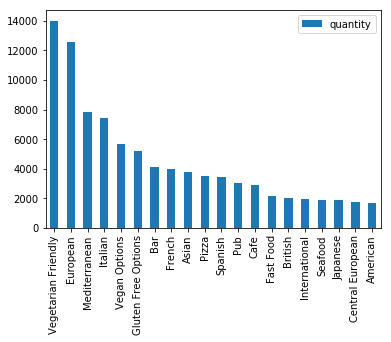

In [23]:
# Отобразим, количество ресторанов, в которых присутствует данных стиль, чтобы оценить границы будущих групп
ax = cousine_count_df[0:20].plot.bar()

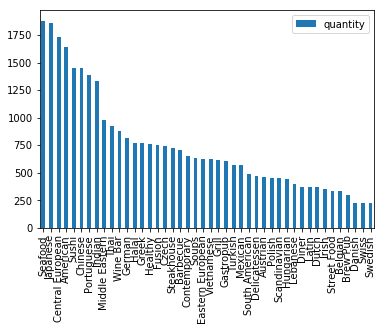

In [24]:
ax = cousine_count_df[16:60].plot.bar()

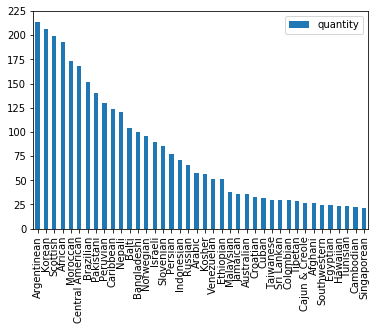

In [25]:
ax = cousine_count_df[60:100].plot.bar()

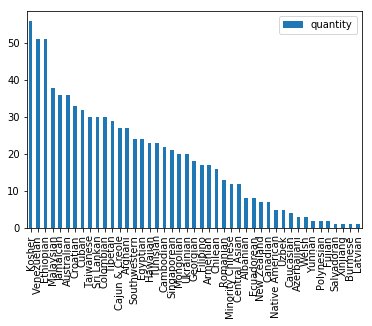

In [26]:
ax = cousine_count_df[80:].plot.bar()

Можно выделить следующие границы, показывающие популярность кухни:

свыше 10 тыс. (общемировые),
свыше 1 тыс. (распространенные),
свыше 100 (редкие),
100 и менее (экзотические).
Представляется, что популярность ресторана может зависить от двух факторов:

- есть ли в его меню распространенная кухня (которая гарантированно подойдет большому числу посетителей)
- есть ли в его меню экзотическая кухня (которая вызовет интерес у посетителей)

In [27]:
# В таблицу стилей кухи добавим информацию о распространенности кухни. Мерой выберем целом число логарифмированного количества ресторанов,
# в котоорых присутсвует кухня. Две нижнии группы объединим в одну.
def wide_spread(cousine_count):
    if np.log10(cousine_count) >= 2:
        return int(np.log10(cousine_count))
    else:
        return 1

In [28]:
# Преобразуем индекс в столбец
# cousine_count_df['cuisine'] = cousine_count_df.index
# Добавлям столбец с данными по распространенности кухни
cousine_count_df['wide_spread'] = cousine_count_df['quantity'].apply(wide_spread)

In [29]:
cousine_count_df

,quantity,wide_spread
Vegetarian Friendly,14021,4
European,12561,4
Mediterranean,7820,3
Italian,7433,3
Vegan Options,5684,3
...,...,...
Fujian,2,1
Salvadoran,1,1
Xinjiang,1,1
Burmese,1,1


In [30]:
cousine_count_df.loc['European','wide_spread']

4

In [31]:
# Функция для каждого ресторана определяет принадлежность его стилей к тому или иному классу распространнености
# В зависимости от паратметра выдает максимальный или минимальный класс имеющихся у ресторана стилей
def cousine_spread(row, val='max'):
    if not row['Cuisine Style'] is np.nan:  
        cousines = cousine_list(row['Cuisine Style'])
        spread = []
        for item in cousines:
            spread.append(cousine_count_df.loc[item,'wide_spread'])
        spread.sort()
        if val == 'max':
            return spread[-1]
        elif val == 'min':
            return spread[0]
        else:
            return np.nan    
    else:
        return np.nan

In [32]:
# Добавляем столбец класса с самой распространеной кухни
df['Cuisine Wide Spread'] = df.apply(lambda row: cousine_spread(row, 'max'), axis=1)
# Добавляем столбец класса с самой экзотической кухней
df['Cuisine Exotic'] = df.apply(lambda row: cousine_spread(row, 'min'), axis=1)

##### Reviews

Можем получить данные, связанные с датами отзывов. Например, количество дней между текущим дней и последним отзывом, и количество дней, между двумя отызывами. Также можем выделить рестораны, где отзыв только один.

In [33]:
# Фунция извекает список с датами из текста
def review_dates(text):
    dates = []
    regex = re.compile('\d\d/\d\d\/\d\d\d\d')
    res = regex.findall(text)
    for item in res:
        dates.append(take_date(item))
    if len(dates)!=0:
        return dates
    else:
        np.nan

In [34]:
# Функция преобразует текст в даты
def take_date(text):
    return datetime.datetime.strptime(text, "%m/%d/%Y")

In [35]:
# Функция рассчтиывает разницу между последним отзывом и текущей датой
def review_last_date(text):
    if type(text) is str:
        if review_dates(text)!=None:
            return (datetime.datetime.today() - max(review_dates(text))).days
        else:
            return np.nan
    else:
        return np.nan

In [36]:
# Добавляем столбец с разнице в дня между текущей датой и последним обзором
df['Review Last Date'] = df['Reviews'].apply(review_last_date)

In [37]:
# Функция рассчитывает разницу в днях между двумя обзорами
def review_dif(text):
    if type(text) is str:
        dates = review_dates(text)
        if dates!=None and len(dates)==2:
            return abs((dates[0]-dates[1]).days)
        else:
            return np.nan  
    else:
        return np.nan

In [38]:
# Добавляем столбец с разнице в днях между двумя обзорами
df['Review Date Dif'] = df['Reviews'].apply(review_dif)

In [39]:
# Фунция рассчитывает количество отзывов на сайте
def reviews_quantity(row):
    if not np.isnan(row['Review Last Date']) and not np.isnan(row['Review Date Dif']):
        return 2
    elif not np.isnan(row['Review Last Date']):
        return 1
    else:
        return 0

In [40]:
# Добавляем столбец с количеством отзывов
df['Reviews Quantity'] = df.apply(lambda row: reviews_quantity(row), axis=1)

##### Price Range

Данные по уровню цен необходимо перевести в числовой форма.

In [41]:
# Функция приводит даныне по уровню цен к числовому виду
def price_num(text):
    if text=='$':
        return 1.0
    elif text=='$$ - $$$':
        return 4.0
    elif text=='$$$$':
        return 7.0
    else:
        return np.nan

In [42]:
# Добавляем столбец с числовым предоставлением уровня цен
df['Price Range Num'] = df['Price Range'].apply(price_num)

In [43]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Ranking Group,Cuisine Style Quantity,Cuisine Wide Spread,Cuisine Exotic,Review Last Date,Review Date Dif,Reviews Quantity,Price Range Num
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,10,2.0,3.0,3.0,NaN,NaN,0,4.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,1,5.0,4.0,2.0,1051.0,37.0,2,4.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,5,1.0,4.0,4.0,1028.0,22.0,2,4.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,2,5.0,4.0,3.0,1050.0,14.0,2,7.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,1,6.0,4.0,3.0,986.0,15.0,2,7.0


### Анализ пропусков

##### Общая картина по пропускам

In [44]:
df.isna().sum()

Restaurant_id                 0
City                          0
Cuisine Style             11590
Ranking                       0
Price Range               17361
Number of Reviews          3200
Reviews                       2
URL_TA                        0
ID_TA                         0
sample                        0
Rating                        0
Ranking Group                 0
Cuisine Style Quantity    11590
Cuisine Wide Spread       11590
Cuisine Exotic            11590
Review Last Date           8114
Review Date Dif           13794
Reviews Quantity              0
Price Range Num           17361
dtype: int64

##### Number of Reviews

У малоизвестных ресторанов отзывов может не быть. Проверяем, фиксируется ли отсутствие отзывов значением 0 или нет.

In [45]:
df.loc[df['Number of Reviews'] == 0]['Number of Reviews'].count()

0

Не фиксируется. Можно предположить, что NaN ставить в случае, когда у ресторана нет отзывов. Если это утверждение верно, тогда случаев NaN у популярных ресторанов должно быть незначительным, чем менее популярен ресторан, тем случаев NaN должно быть больше. Проверим это преположение.
Проверим распределение NaN по ренкингу ресторанов. Для этого проанализуем распределение частоты NaN в группах ренкига по города. Создадим 4 группы (1 - входит в 25% самых популярных, 4 - входит в 25% самых не популярных).

In [46]:
# Создаем новый столбец, в который вносим данные по ренкингу в относительных единицах:
# 1 - самые популярные, 4 - самые непопулярные
df['Ranking Group Test'] = df.apply(lambda row: ranking_by_steps(row, 4), axis=1)

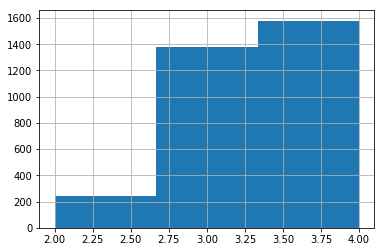

In [47]:
df.loc[df['Number of Reviews'].isna()]['Ranking Group Test'].hist(bins=3)


Наше предположение оказалось верным: в самых популярных ресторанах NaN не зафиксирован, чем ниже популярность, тем выше доля Nan. То есть можно преположить, что вместо NaN должны быть нули.
Заменяем значения NaN на 0.

In [48]:
df['Number of Reviews'].fillna(0, inplace=True)

Добавим еще один столбец, который нивелирует недостаток количества отзывав - размеры и популярность города.
Рассчитаем, какую долю ресторан занимает в своем городе по отзывам.

In [49]:
# Предрасчитываем данные
calculated = pd.DataFrame(df.groupby(['City'])['Number of Reviews'].sum())

# Добавим показатель доли отзывов, приходящихся на ресторан в данном городе
def number_of_reviews_share(row):
    return row['Number of Reviews'] / calculated.loc[row['City']]

df['Number of Reviews Share'] = df.apply(lambda row: number_of_reviews_share(row), axis=1)

##### Cuisine Style Quantity,Cuisine Wide Spread,Cuisine Exotic

Можно препроложить, что ресторан не размещает в своем профиле данные о принадлежности к той или иной кухне, если он предлагает наиболее распространенные стили. Сложно преположить, что предлагая экзотическую кухню, ресторан не укажет это.

In [50]:
# Проверим, как распределены рестораны по свойствам Cuisine Wide Spread/ Cuisine Exotic
df.groupby(['Cuisine Wide Spread','Cuisine Exotic'])['Restaurant_id'].count()

Cuisine Wide Spread  Cuisine Exotic
1.0                  1.0                  54
2.0                  1.0                 149
                     2.0                1950
3.0                  1.0                 311
                     2.0                3727
                     3.0               11749
4.0                  1.0                 758
                     2.0                8901
                     3.0               10251
                     4.0                 560
Name: Restaurant_id, dtype: int64

In [51]:
# Для ресторанов, у которых пропущен признак "Cuisine Wide Spread", установим его равным 4
df['Cuisine Wide Spread Nan'] = df['Cuisine Wide Spread'].isna().astype('int8')
df['Cuisine Wide Spread'].fillna(4, inplace=True) 

In [52]:
# Для ресторанов, у которых пропущен признак "Cuisine Exotic", установим его равным мединанному значению
# по группе 4 "Cuisine Wide Spread"
df['Cuisine Exotic Nan'] = df['Cuisine Exotic'].isna().astype('int8')
df['Cuisine Exotic'].fillna(df.loc[df['Cuisine Wide Spread']==4]['Cuisine Exotic'].median(), inplace=True) 

In [53]:
# Количество стилей кухни установим равным медианному количеству в выборке "Cuisine Wide Spread" = 4
# "Cuisine Exotic" = 3
df['Cuisine Style Quantity Nan'] = df['Cuisine Style Quantity'].isna().astype('int8')
df['Cuisine Style Quantity'].fillna(df.loc[(df['Cuisine Wide Spread']==4) & 
                                          (df['Cuisine Exotic']==3)]['Cuisine Style Quantity'].median(), inplace=True) 

##### Review Last Date, Review Date Dif

In [54]:
# Устанавливаем призак, что в столбцах нет данных
df['Review Last Date Nan'] = df['Review Last Date'].isna().astype('int8')
df['Review Date Dif Nan'] = df['Review Date Dif'].isna().astype('int8')

In [55]:
# Предрасчитываем данные для замены
calculated = pd.DataFrame(df.groupby(['City','Ranking Group'])['Review Last Date'].median())
max_last = df['Review Last Date'].max()

# Функция замены Nan в столбце Review Last Date
# Eсли количество отзывов равно нулю, то по ресторану нет отзывов
# в этом случае проставляем максимальное значение по столбцу
# Если количество не равно нулю, то отзывы есть, у нас не хватает данных. В этом случае проставляем
# медианное значение по группе ренкинга и города
def last_date_change(row):
    if row['Number of Reviews']==0:
        return max_last
    else:
        return calculated.loc[(row['City'], row['Ranking Group'])]

In [56]:
# Избавляемся от Nan
df.loc[df['Review Last Date'].isna(),'Review Last Date'] = df.apply(lambda row: last_date_change(row), axis=1)

In [57]:
# Предрасчитываем данные для замены
calculated = pd.DataFrame(df.groupby(['City','Ranking Group'])['Review Date Dif'].median())
max_dif = df['Review Date Dif'].max()

# Функция замены Nan в столбце Review Date Dif
# Eсли количество отзывов меньше 2, то по ресторану второго отзыва
# в этом случае проствляем максимальное значение по столбцу
# Если количество 2 и больше, то второй отзыв есть, у нас не хватает данных. В этом случае проставляем
# медианное значение по группе ренкинга и города
def date_dif_change(row):
    if not np.isnan(row['Review Date Dif']):
        return row['Review Date Dif']
    elif row['Number of Reviews']<2:
        return max_dif
    else:
        return calculated.loc[(row['City'], row['Ranking Group'])]

In [58]:
# Избавляемся от Nan
df['Review Date Dif'] = df.apply(lambda row: date_dif_change(row), axis=1)

##### Price Range Num
Отсутствующее указания ценового диапазона обычно свойственно более дешевым ресторанам

In [59]:
# Заменяет Nan
df['Price Range Num Nan'] = df['Price Range'].isna().astype('int8')
# Отсутствующее указание ценового диапазона обычно свойственно более дешевым ресторанам
df['Price Range Num'].fillna(1, inplace=True)
df['Price Range Num'] = df['Price Range Num'].astype('int8')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
Restaurant_id                 50000 non-null object
City                          50000 non-null object
Cuisine Style                 38410 non-null object
Ranking                       50000 non-null float64
Price Range                   32639 non-null object
Number of Reviews             50000 non-null float64
Reviews                       49998 non-null object
URL_TA                        50000 non-null object
ID_TA                         50000 non-null object
sample                        50000 non-null int64
Rating                        50000 non-null float64
Ranking Group                 50000 non-null int64
Cuisine Style Quantity        50000 non-null float64
Cuisine Wide Spread           50000 non-null float64
Cuisine Exotic                50000 non-null float64
Review Last Date              50000 non-null float64
Review Date Dif               50000 non-null float64
R

#### Города в отдельных столбцах

In [61]:
# В первых 16-ти городов находится более 80% все ресторанов 
cities_with_freqs = list(df['City'].value_counts(normalize=True))
sum(cities_with_freqs[0:16])

0.81158

In [62]:
main = df['City'].value_counts().index[0:16]

In [63]:
# Функция оставляет первые 16-ть городов, остальные переименовывает в Others
def main_cities(text):
    if text in main:
        text = text
    else:
        text = 'Others'
    return text

In [64]:
# Добавляем столбцы-города
df['City New'] = df['City'].apply(main_cities)
city_dum = pd.get_dummies(df['City New'], drop_first=True)
df = df.join(city_dum)

In [65]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Lyon,Madrid,Milan,Munich,Others,Paris,Prague,Rome,Stockholm,Vienna
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,0,0,0,1,0,0,0,0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,0,0,1,0,0,0,0,0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0,0,1,0,0,0,0,0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,0,0,1,0,0,0,0,0


In [66]:
# Удаляем лишние столбцы
df.drop(['City','Cuisine Style','Price Range','Reviews','URL_TA','ID_TA',
        'City New', 'Ranking Group Test','Restaurant_id'],axis=1,inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 35 columns):
Ranking                       50000 non-null float64
Number of Reviews             50000 non-null float64
sample                        50000 non-null int64
Rating                        50000 non-null float64
Ranking Group                 50000 non-null int64
Cuisine Style Quantity        50000 non-null float64
Cuisine Wide Spread           50000 non-null float64
Cuisine Exotic                50000 non-null float64
Review Last Date              50000 non-null float64
Review Date Dif               50000 non-null float64
Reviews Quantity              50000 non-null int64
Price Range Num               50000 non-null int8
Number of Reviews Share       50000 non-null float64
Cuisine Wide Spread Nan       50000 non-null int8
Cuisine Exotic Nan            50000 non-null int8
Cuisine Style Quantity Nan    50000 non-null int8
Review Last Date Nan          50000 non-null int8
Review Date

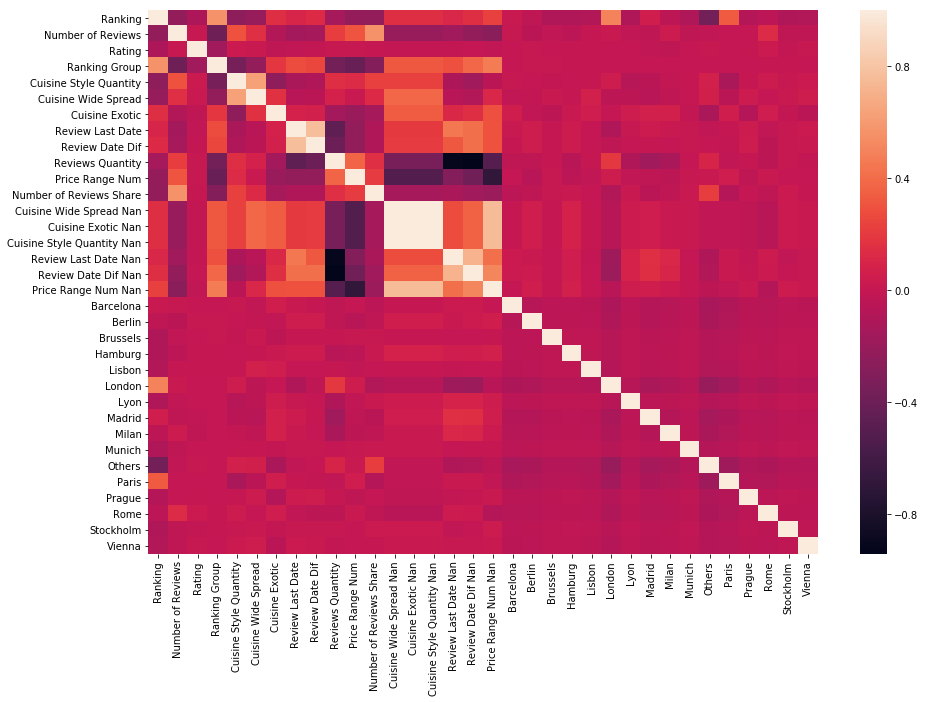

In [68]:
# Создаем матрицу корреляции
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df.drop(['sample'], axis=1).corr(),)

#### Запускаем и проверяем что получилось

In [69]:
df_preproc = df
df_preproc.sample(10)

,Ranking,Number of Reviews,sample,Rating,Ranking Group,Cuisine Style Quantity,Cuisine Wide Spread,Cuisine Exotic,Review Last Date,Review Date Dif,...,Lyon,Madrid,Milan,Munich,Others,Paris,Prague,Rome,Stockholm,Vienna
19701,256.0,116.0,1,4.5,2,4.0,4.0,3.0,1027.0,2.0,...,0,0,0,0,1,0,0,0,0,0
11238,1438.0,68.0,1,4.0,2,3.0,4.0,3.0,1238.0,5.0,...,0,0,0,0,0,0,0,0,0,0
44328,224.0,1595.0,1,4.5,1,6.0,4.0,2.0,1024.0,0.0,...,0,0,0,0,0,0,0,0,0,0
27837,1656.0,11.0,1,4.5,6,4.0,4.0,3.0,1183.0,229.0,...,0,0,0,0,0,0,0,0,0,0
28481,275.0,782.0,1,4.0,2,6.0,4.0,3.0,1019.0,31.0,...,0,0,0,0,1,0,0,0,0,0
43605,3474.0,128.0,1,4.0,3,3.0,4.0,2.0,1018.0,2.0,...,0,0,0,0,0,0,0,0,0,0
23551,31.0,432.0,1,4.5,1,5.0,4.0,2.0,1014.0,10.0,...,1,0,0,0,0,0,0,0,0,0
17869,2549.0,30.0,1,3.0,10,1.0,3.0,3.0,1186.0,121.0,...,0,0,0,0,0,0,0,0,0,0
16350,2445.0,17.0,1,4.5,4,1.0,2.0,2.0,1201.0,105.0,...,0,0,1,0,0,0,0,0,0,0
45155,1614.0,0.0,1,5.0,6,4.0,4.0,3.0,6027.0,3296.0,...,0,0,0,1,0,0,0,0,0,0


In [70]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 35 columns):
Ranking                       50000 non-null float64
Number of Reviews             50000 non-null float64
sample                        50000 non-null int64
Rating                        50000 non-null float64
Ranking Group                 50000 non-null int64
Cuisine Style Quantity        50000 non-null float64
Cuisine Wide Spread           50000 non-null float64
Cuisine Exotic                50000 non-null float64
Review Last Date              50000 non-null float64
Review Date Dif               50000 non-null float64
Reviews Quantity              50000 non-null int64
Price Range Num               50000 non-null int8
Number of Reviews Share       50000 non-null float64
Cuisine Wide Spread Nan       50000 non-null int8
Cuisine Exotic Nan            50000 non-null int8
Cuisine Style Quantity Nan    50000 non-null int8
Review Last Date Nan          50000 non-null int8
Review Date

In [71]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [72]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [73]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 34), (40000, 34), (40000, 33), (32000, 33), (8000, 33))

# Model 
Сам ML

In [74]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [75]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [76]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [77]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21032437499999998


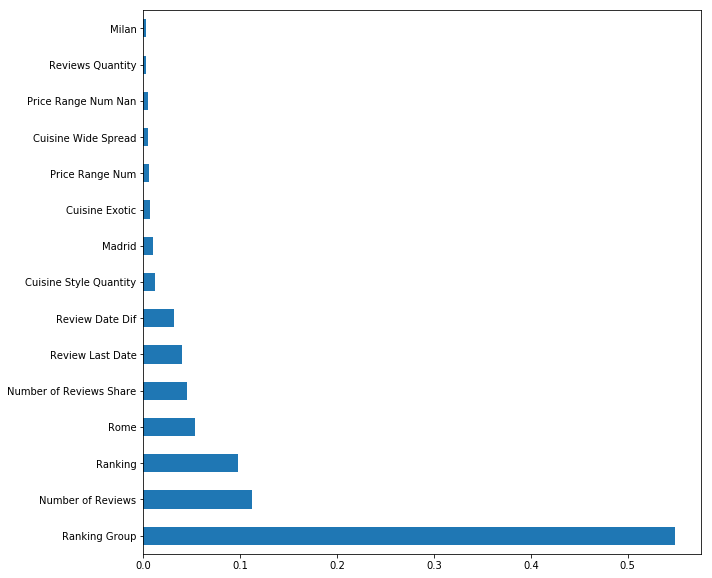

In [78]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [79]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,Ranking Group,Cuisine Style Quantity,Cuisine Wide Spread,Cuisine Exotic,Review Last Date,Review Date Dif,Reviews Quantity,...,Lyon,Madrid,Milan,Munich,Others,Paris,Prague,Rome,Stockholm,Vienna
5150,1117.0,20.0,0.0,6,1.0,4.0,4.0,1204.0,204.0,2,...,0,0,0,0,1,0,0,0,0,0
8209,3624.0,7.0,0.0,6,4.0,4.0,3.0,1656.0,244.0,2,...,0,0,0,0,0,0,0,0,0,0
8941,1106.0,0.0,0.0,6,4.0,4.0,3.0,2440.0,3296.0,1,...,0,0,0,0,1,0,0,0,0,0
4377,497.0,17.0,0.0,2,3.0,4.0,3.0,1225.0,73.0,2,...,0,0,0,1,0,0,0,0,0,0
6238,8427.0,9.0,0.0,6,4.0,3.0,2.0,1149.0,7.0,2,...,0,0,0,0,0,0,0,0,0,0
8039,929.0,16.0,0.0,7,3.0,4.0,2.0,1375.0,501.0,2,...,0,0,0,0,1,0,0,0,0,0
8795,7226.0,2.0,0.0,9,1.0,3.0,3.0,2752.0,128.0,1,...,0,1,0,0,0,0,0,0,0,0
3092,5688.0,35.0,0.0,4,7.0,4.0,2.0,1179.0,39.0,2,...,0,0,0,0,0,0,0,0,0,0
6194,1140.0,42.0,0.0,7,2.0,4.0,2.0,1146.0,12.0,2,...,0,0,0,0,1,0,0,0,0,0
627,1070.0,12.0,0.0,9,1.0,3.0,3.0,2567.0,47.0,2,...,0,0,0,0,1,0,0,0,0,0


In [80]:
test_data = test_data.drop(['Rating'], axis=1)

In [81]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [82]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [83]:
predict_submission

array([3.095, 4.31 , 4.375, ..., 3.04 , 4.495, 4.425])

In [84]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.095
1,id_1,4.310
2,id_2,4.375
3,id_3,4.355
4,id_4,4.350
5,id_5,4.355
6,id_6,3.110
7,id_7,2.540
8,id_8,4.245
9,id_9,4.615
